Distancias derecha 39.5 cm

Distancias izquierda 40 cm

Distancia entre hombros: 36 cm

Distancia cadera: 26 cm

Distancias frente en 5m,4m y 2m  ByN.Color


In [2]:
import pandas as pd
import matplotlib
phats=['Estadisticas/EstadisticasF_5m_nano_ByN.csv','Estadisticas/EstadisticasF_4m_nano_ByN.csv','Estadisticas/EstadisticasF_2m_nano_ByN.csv']
datos=[]
for phat in phats:
    df =pd.read_csv(phat)
    datos.append(df)



In [3]:
distancia=['5','4','2']
for indice,dato in enumerate(datos):
    print(f'Distancia Euclidiana entre hombros a {distancia[indice]}metros es: {dato['dist_euclid_shlders'].mean()}')
    print(f'Distancia Manhattan entre hombros a {distancia[indice]}metros {dato['dist_manh_shlders'].mean()}')
    print('\n')
#Distancias 'Real' de entre hombros 36 cm

Distancia Euclidiana entre hombros a 5metros es: 16.529880410667772
Distancia Manhattan entre hombros a 5metros 17.296539306640625


Distancia Euclidiana entre hombros a 4metros es: 19.621555332462226
Distancia Manhattan entre hombros a 4metros 20.123968505859374


Distancia Euclidiana entre hombros a 2metros es: 37.865040490865326
Distancia Manhattan entre hombros a 2metros 39.76335906982422




In [4]:
for indice,dato in enumerate(datos):
    print(f'Distancia Euclidiana de cadera {distancia[indice]}metros es: {dato['dist_euclid_hips'].mean()}')
    print(f'Distancia Manhattan de cadera {distancia[indice]}metros {dato['dist_manh_hips'].mean()}')
    print('\n')

#Distancias 'Real' de cadera 26cm

Distancia Euclidiana de cadera 5metros es: 10.714570330777132
Distancia Manhattan de cadera 5metros 10.93162082981419


Distancia Euclidiana de cadera 4metros es: 12.56578031490985
Distancia Manhattan de cadera 4metros 12.854898579915364


Distancia Euclidiana de cadera 2metros es: 24.20780302549299
Distancia Manhattan de cadera 2metros 25.585329818725587




In [5]:
for indice,dato in enumerate(datos):
    print(f'Distancia Euclidiana de cadera {distancia[indice]}metros es: {dato['dist_euclid_right_shoulder_hip'].mean()}')
    print(f'Distancia Manhattan de cadera {distancia[indice]}metros {dato['dist_manh_right_shoulder_hip'].mean()}')
    print('\n')

#Distancias 'Real' de hombro y cadera derecha 39.5 cm

Distancia Euclidiana de cadera 5metros es: 42.17838408718908
Distancia Manhattan de cadera 5metros 44.00121245513091


Distancia Euclidiana de cadera 4metros es: 52.36976942530443
Distancia Manhattan de cadera 4metros 54.52725830078125


Distancia Euclidiana de cadera 2metros es: 101.06505515978982
Distancia Manhattan de cadera 2metros 110.80928993225098




In [6]:
for indice,dato in enumerate(datos):
    print(f'Distancia Euclidiana de cadera {distancia[indice]}metros es: {dato['dist_euclid_left_shoulder_hip'].mean()}')
    print(f'Distancia Manhattan de cadera {distancia[indice]}metros {dato['dist_manh_left_shoulder_hip'].mean()}')
    print('\n')
#Distancias 'Real' de hombro y cadera izquierda 40

Distancia Euclidiana de cadera 5metros es: 42.71502738874063
Distancia Manhattan de cadera 5metros 46.455331338418496


Distancia Euclidiana de cadera 4metros es: 52.587511851655925
Distancia Manhattan de cadera 4metros 57.20046844482422


Distancia Euclidiana de cadera 2metros es: 100.59234719310257
Distancia Manhattan de cadera 2metros 103.79744186401368




## Variaciones entre posiciones, color y ByN


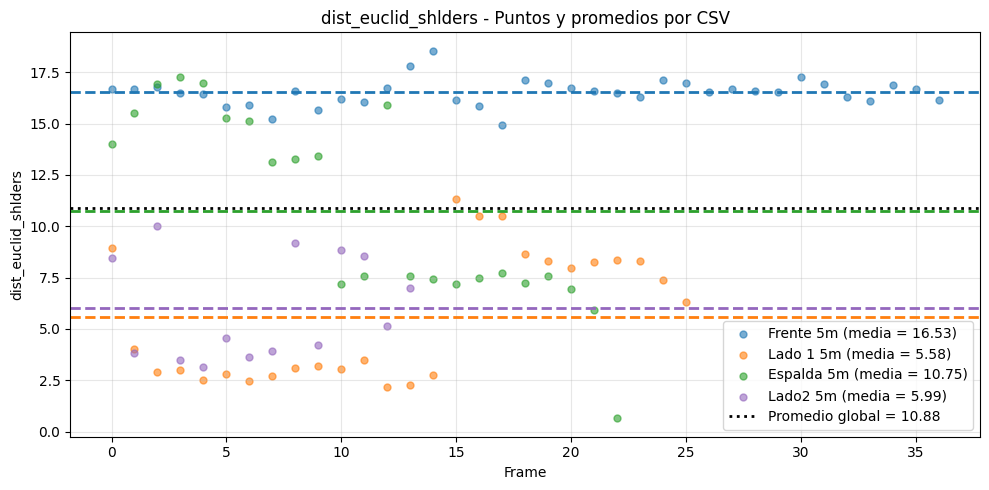

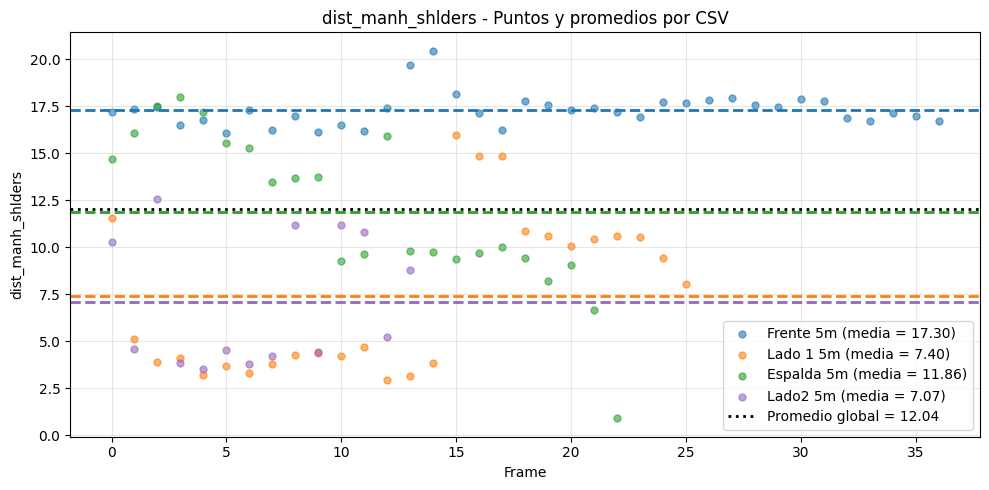

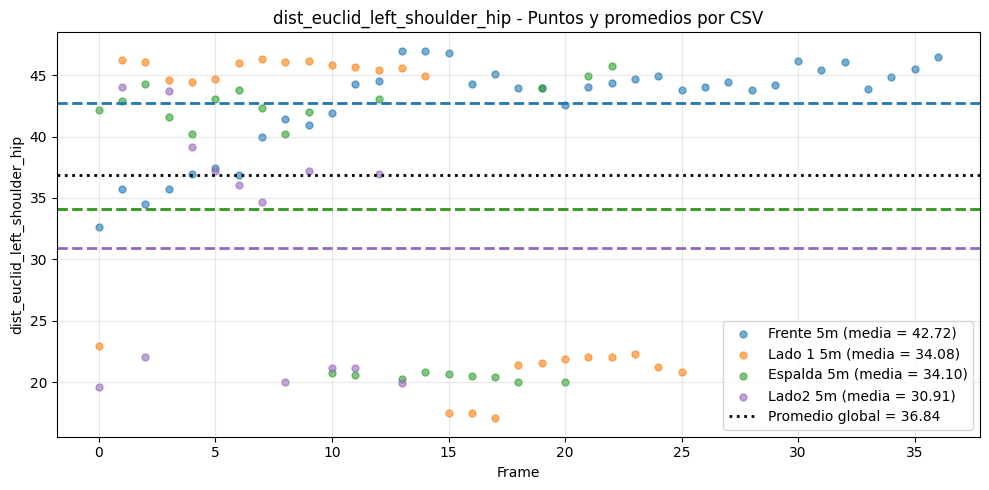

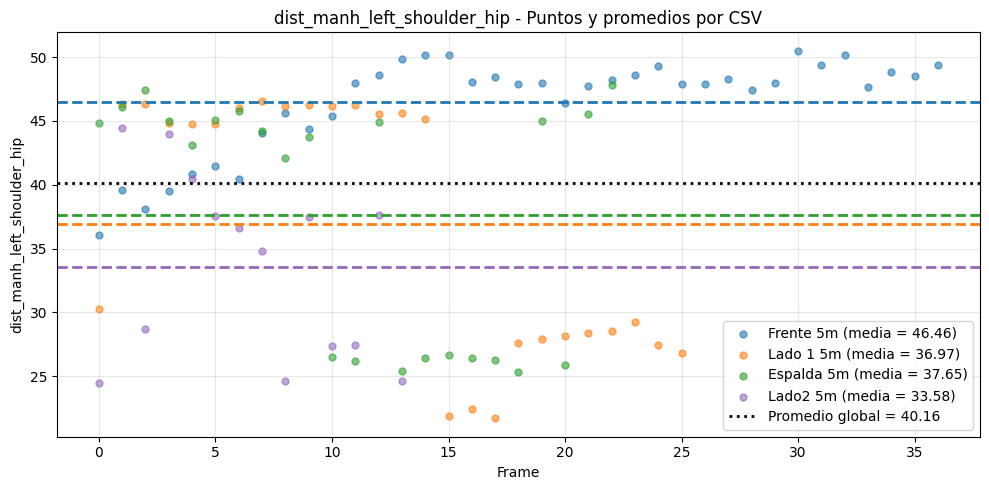

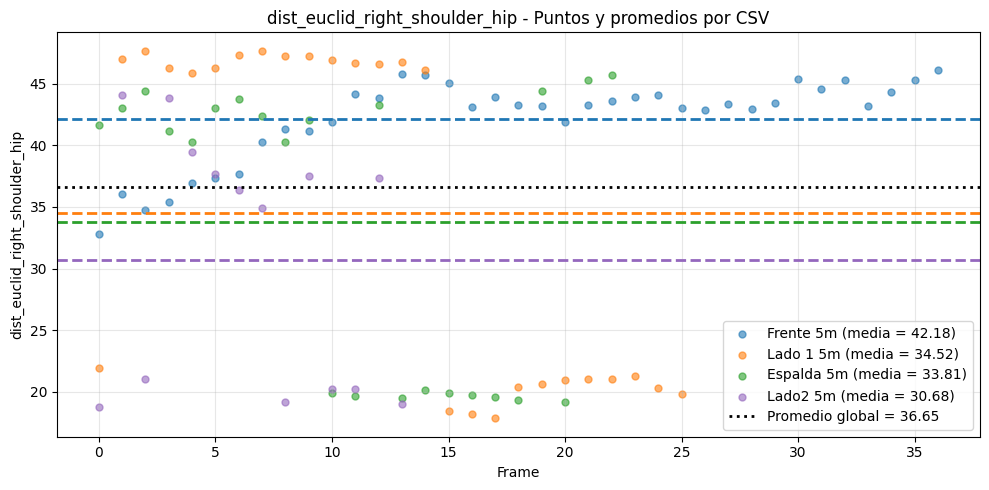

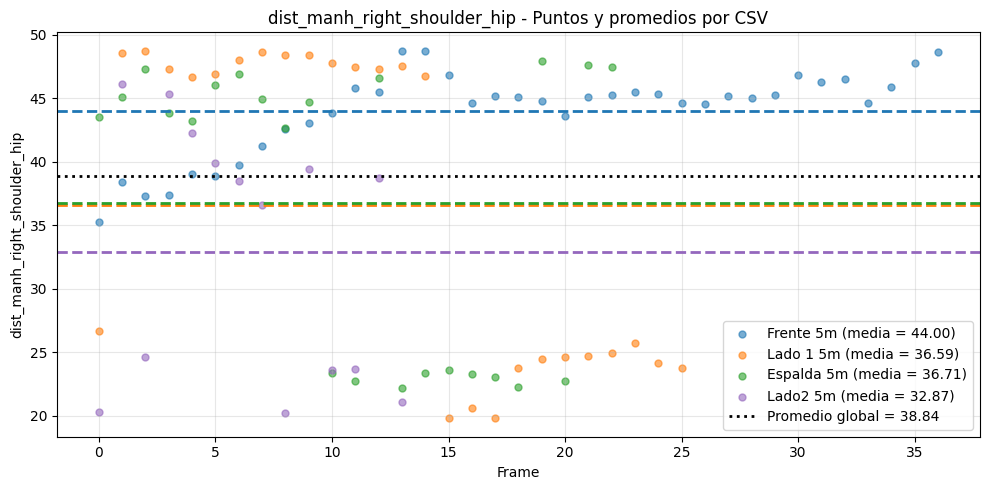

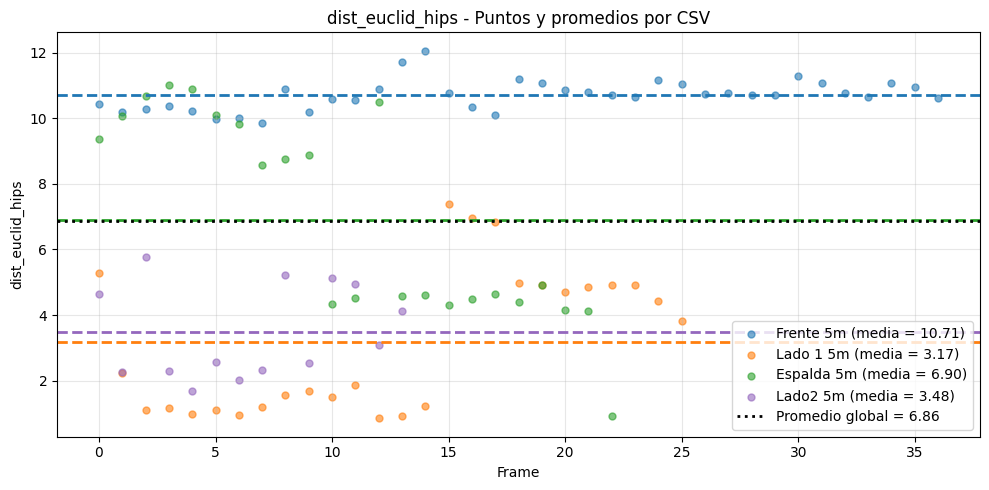

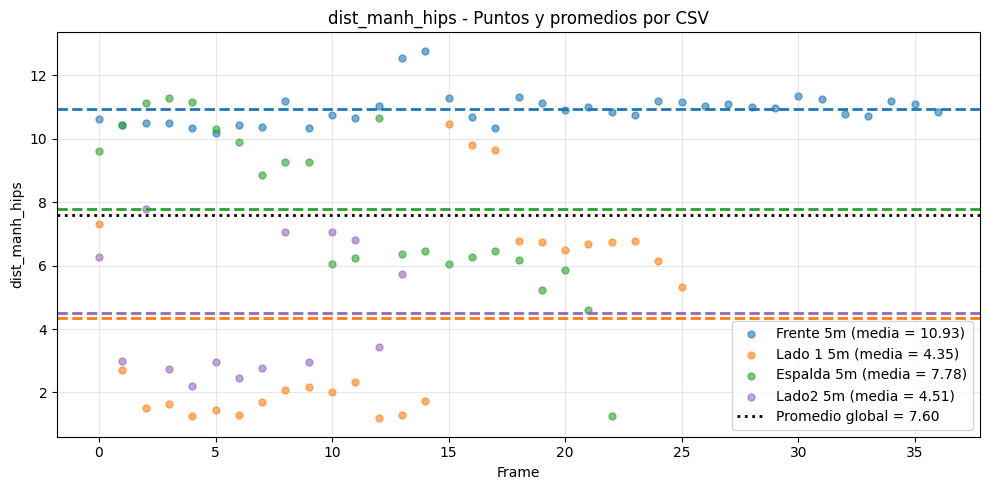

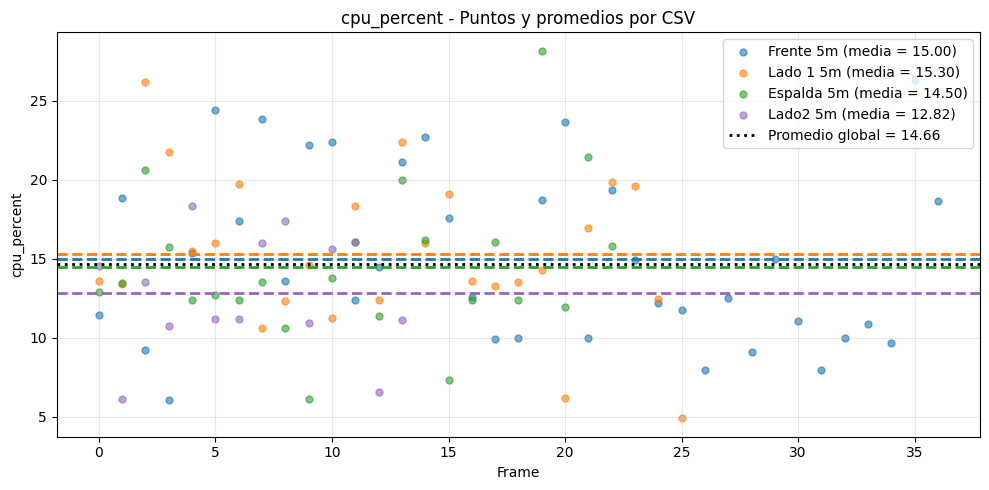

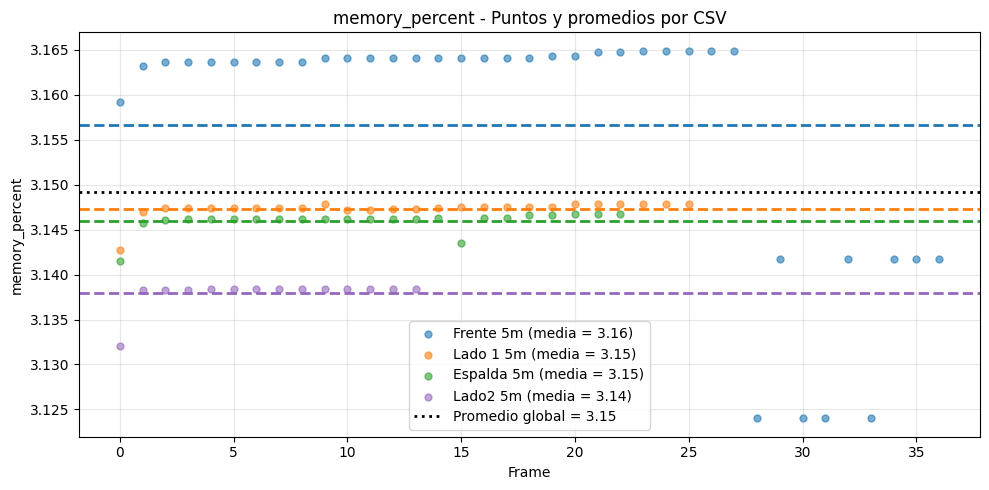

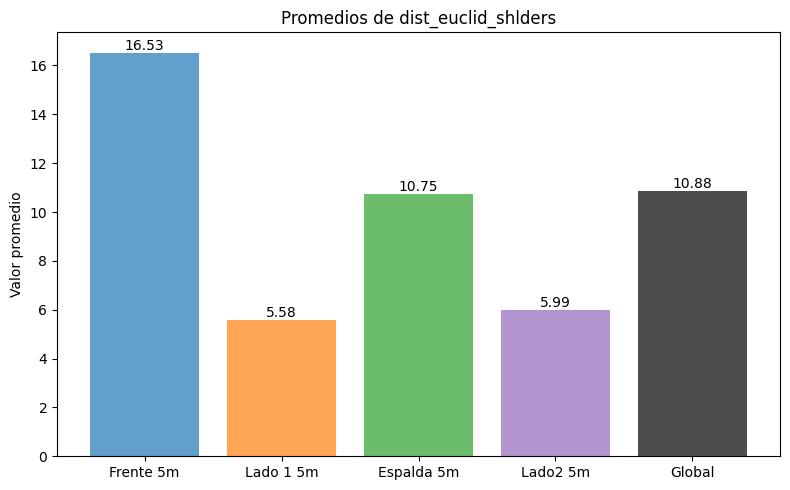

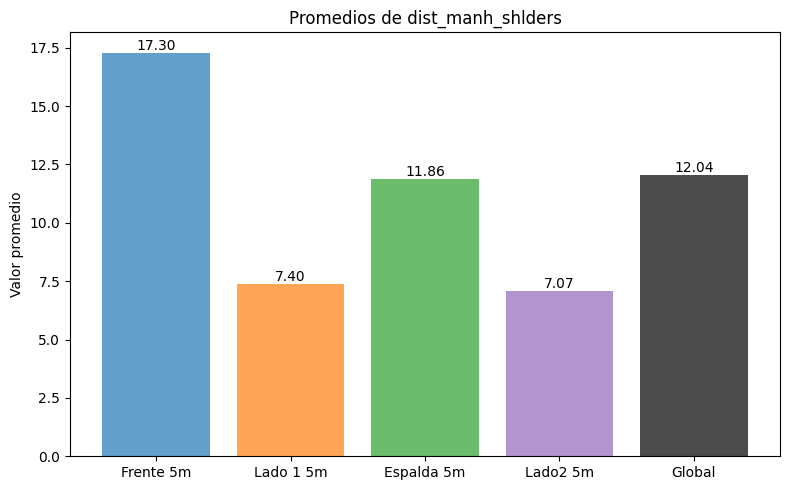

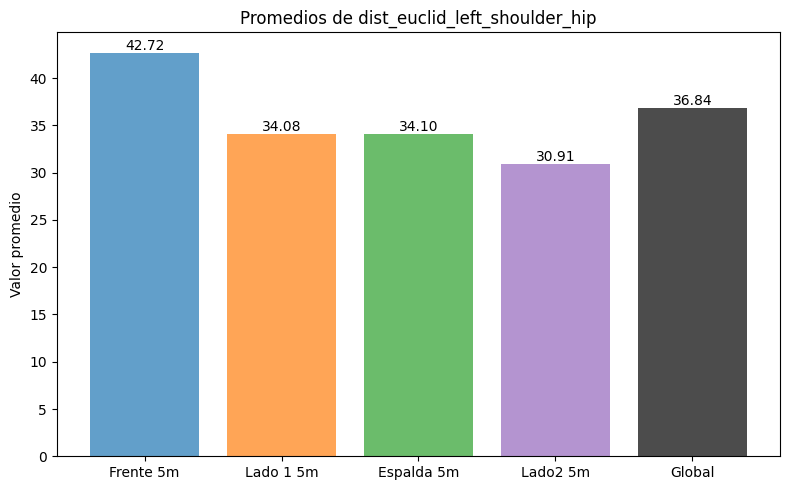

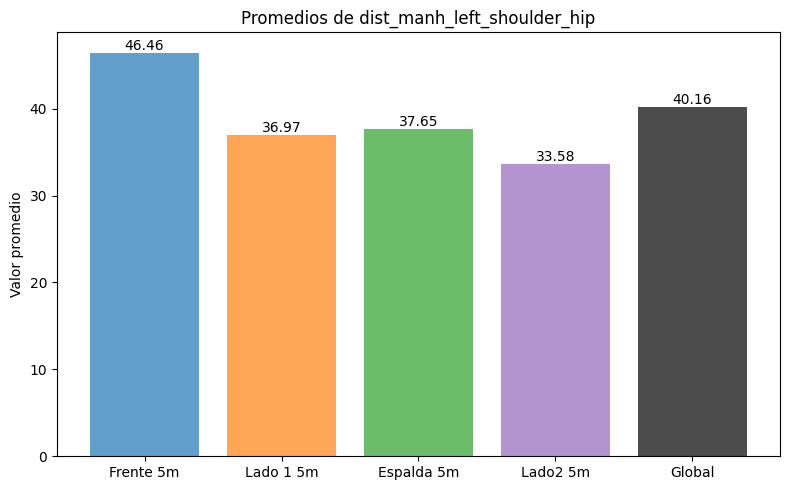

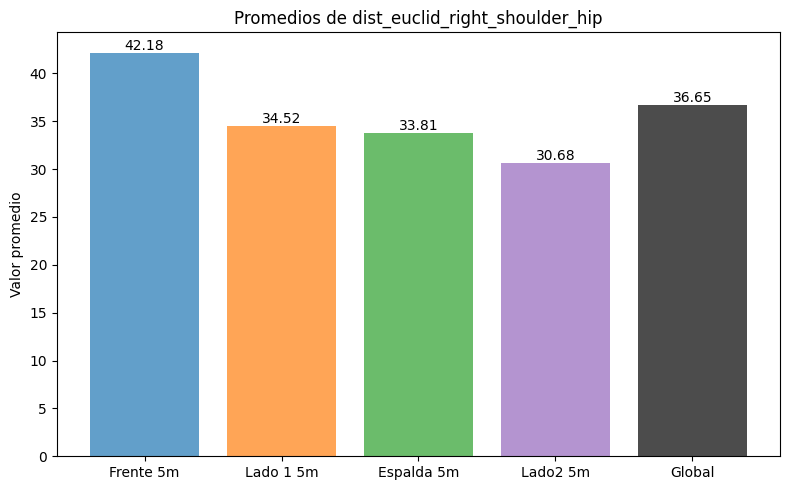

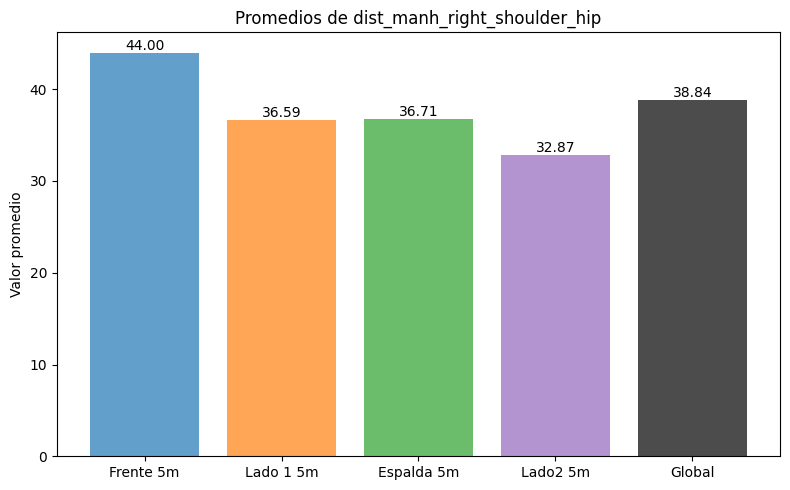

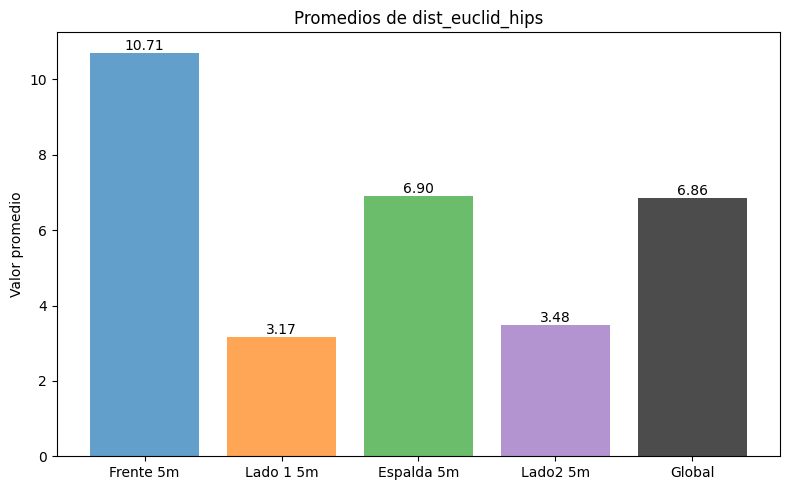

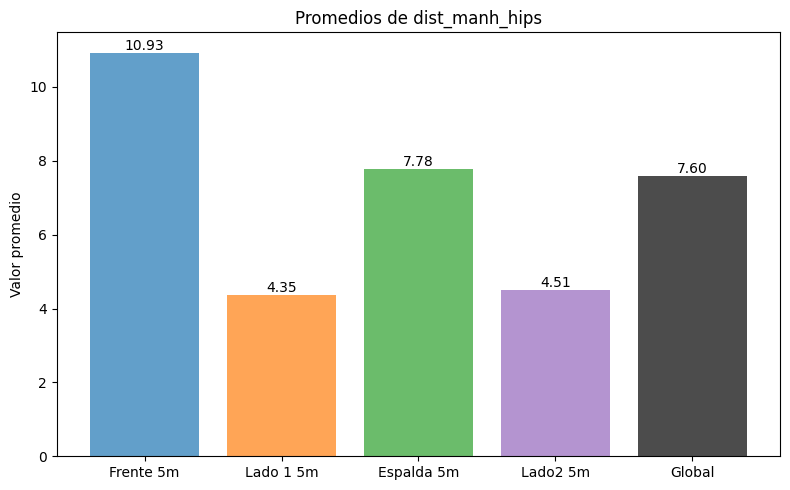

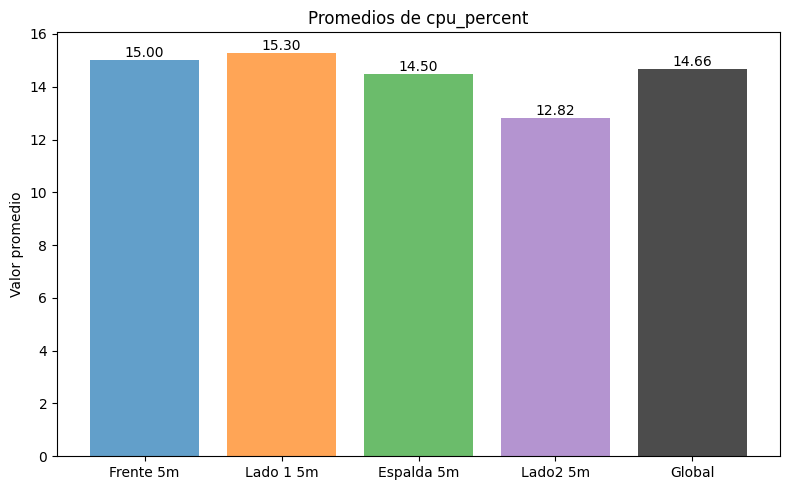

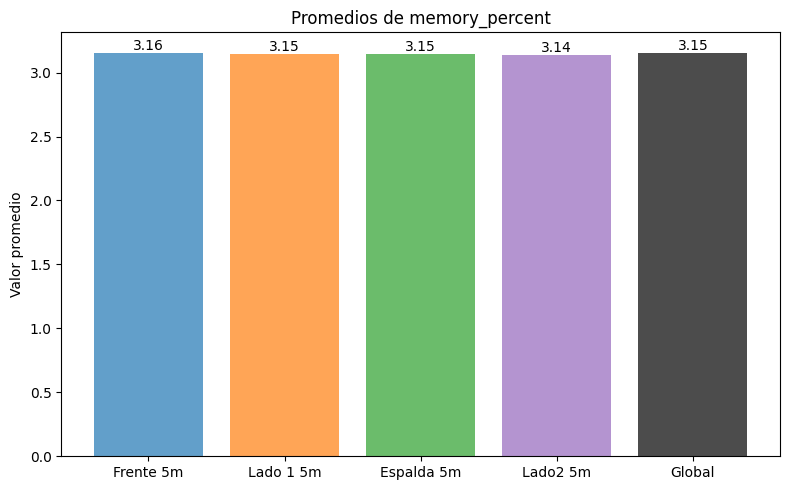

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === ARCHIVOS CSV ===
csv_files = ['Estadisticas/EstadisticasF_5m_nano_ByN.csv', 
             "Estadisticas/EstadisticasL15m_nano_ByN.csv", 
             'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
             "Estadisticas/EstadisticasL25m_nano_ByN.csv"]

nombres = ["Frente 5m", "Lado 1 5m", "Espalda 5m","Lado2 5m"]
colores = ["tab:blue", "tab:orange", "tab:green","tab:purple"]
# === CARGA DE LOS CSV ===
dfs = []
for i, file in enumerate(csv_files):
    df_temp = pd.read_csv(file)
    df_temp["origen"] = nombres[i]
    dfs.append(df_temp)

# Combinar todo en un solo DataFrame
df = pd.concat(dfs, ignore_index=True)

# === MÉTRICAS A ANALIZAR ===
metricas = [
    "dist_euclid_shlders", "dist_manh_shlders",
    "dist_euclid_left_shoulder_hip", "dist_manh_left_shoulder_hip",
    "dist_euclid_right_shoulder_hip", "dist_manh_right_shoulder_hip",
    "dist_euclid_hips", "dist_manh_hips",
    "cpu_percent", "memory_percent"
]

# === VISUALIZACIÓN 1: DISPERSIÓN CON PROMEDIOS ===
for metrica in metricas:
    plt.figure(figsize=(10, 5))

    # Graficar puntos y líneas de promedio para cada CSV
    for i, df_individual in enumerate(dfs):
        plt.scatter(
            df_individual["frame"], df_individual[metrica],
            label=f"{nombres[i]} (media = {df_individual[metrica].mean():.2f})",
            alpha=0.6, s=25, color=colores[i]
        )
        plt.axhline(
            y=df_individual[metrica].mean(),
            color=colores[i],
            linestyle="--",
            linewidth=2
        )

    # Graficar promedio global
    promedio_global = df[metrica].mean()
    plt.axhline(
        y=promedio_global,
        color="black",
        linestyle=":",
        linewidth=2,
        label=f"Promedio global = {promedio_global:.2f}"
    )

    plt.title(f"{metrica} - Puntos y promedios por CSV")
    plt.xlabel("Frame")
    plt.ylabel(metrica)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# === VISUALIZACIÓN 2: GRÁFICOS DE BARRAS PARA PROMEDIOS ===
for metrica in metricas:
    plt.figure(figsize=(8, 5))

    # Calcular promedios individuales
    promedios = [df_individual[metrica].mean() for df_individual in dfs]
    promedio_global = df[metrica].mean()

    # Posiciones para las barras
    x = np.arange(len(nombres) + 1)
    valores = promedios + [promedio_global]
    etiquetas = nombres + ["Global"]
    colores_barras = colores + ["black"]

    # Graficar barras
    plt.bar(x, valores, color=colores_barras, alpha=0.7)
    for i, v in enumerate(valores):
        plt.text(i, v, f"{v:.2f}", ha="center", va="bottom", fontsize=10)

    plt.xticks(x, etiquetas)
    plt.title(f"Promedios de {metrica}")
    plt.ylabel("Valor promedio")
    plt.tight_layout()
    plt.show()


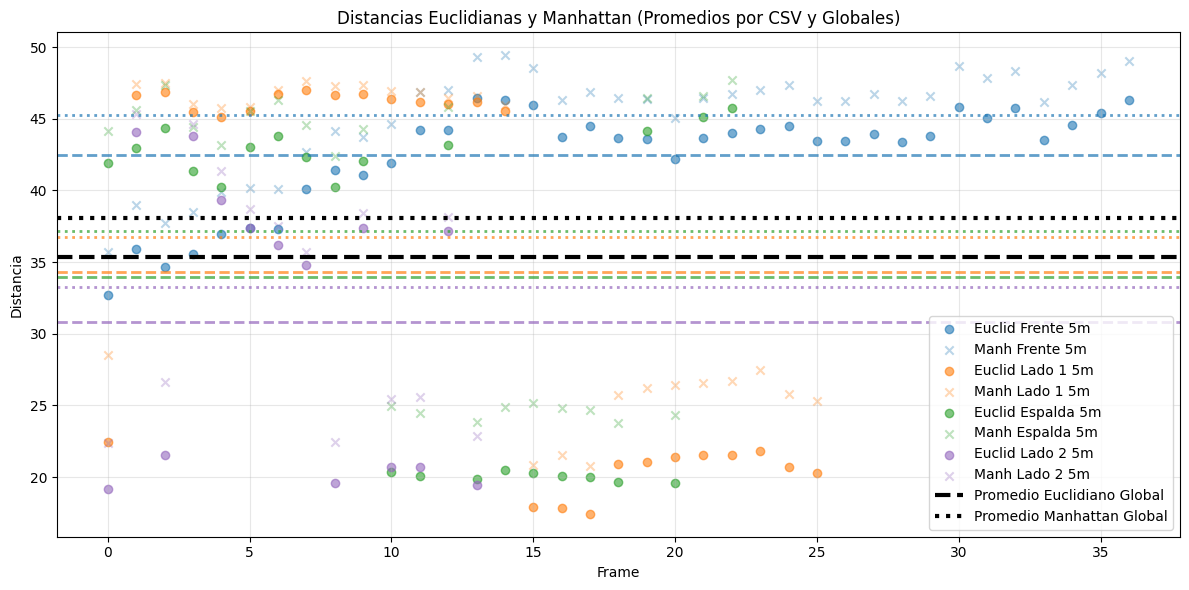

In [15]:

# === CONFIGURACIÓN ===
csv_files = [
    'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL15m_nano_ByN.csv",
    'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL25m_nano_ByN.csv"
]
nombres = ["Frente 5m", "Lado 1 5m", "Espalda 5m", "Lado 2 5m"]
colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]

# Columnas que vamos a usar
cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# === CARGA DE LOS DATOS ===
dfs = [pd.read_csv(f) for f in csv_files]

# === CREAR LA FIGURA ===
plt.figure(figsize=(12, 6))

# Listas para calcular promedios globales
euclid_global = []
manh_global = []

# === PLOT PARA CADA CSV ===
for df, nombre, color in zip(dfs, nombres, colores):
    # Puntos individuales
    euclid_points = df[cols_euclid].mean(axis=1)
    manh_points   = df[cols_manh].mean(axis=1)
    
    # Dibujamos los puntos
    plt.scatter(df["frame"], euclid_points, color=color, alpha=0.6, label=f"Euclid {nombre}")
    plt.scatter(df["frame"], manh_points, color=color, alpha=0.3, marker="x", label=f"Manh {nombre}")
    
    # Promedios por CSV
    mean_euclid = euclid_points.mean()
    mean_manh   = manh_points.mean()
    
    # Líneas horizontales por CSV
    plt.axhline(mean_euclid, color=color, linestyle="--", linewidth=2, alpha=0.7)
    plt.axhline(mean_manh, color=color, linestyle=":", linewidth=2, alpha=0.7)
    
    # Guardamos promedios para global
    euclid_global.append(mean_euclid)
    manh_global.append(mean_manh)

# === PROMEDIOS GLOBALES ===
global_euclid = sum(euclid_global) / len(euclid_global)
global_manh   = sum(manh_global) / len(manh_global)

plt.axhline(global_euclid, color="black", linestyle="--", linewidth=3, label="Promedio Euclidiano Global")
plt.axhline(global_manh, color="black", linestyle=":", linewidth=3, label="Promedio Manhattan Global")

# === CONFIGURACIÓN FINAL ===
plt.title("Distancias Euclidianas y Manhattan (Promedios por CSV y Globales)")
plt.xlabel("Frame")
plt.ylabel("Distancia")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


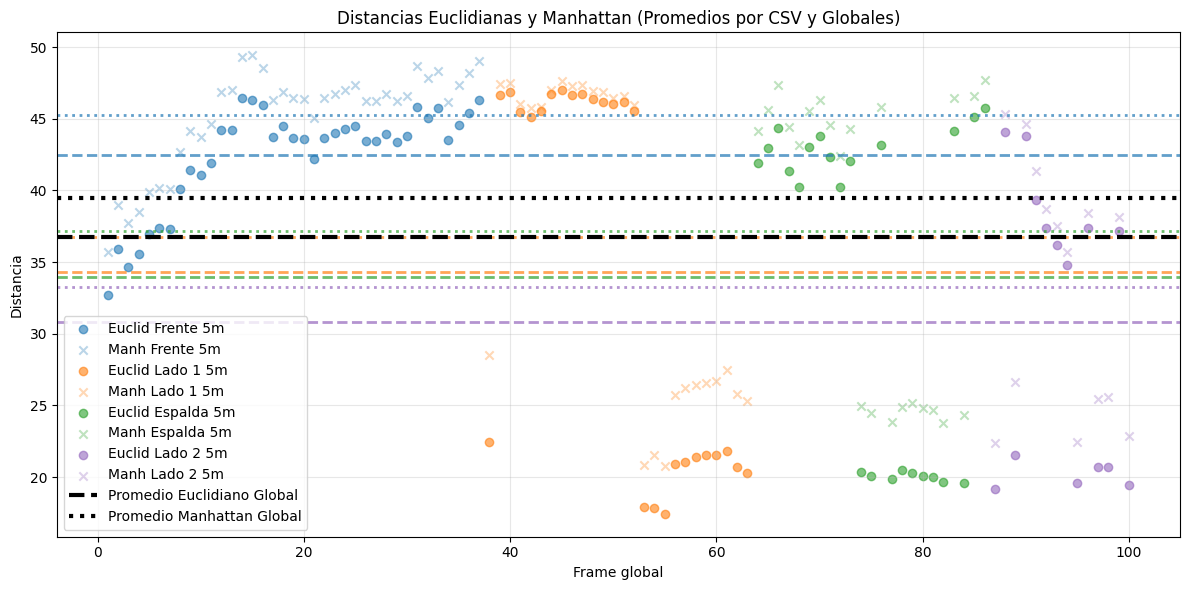

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURACIÓN ===
csv_files = [
    'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL15m_nano_ByN.csv",
    'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL25m_nano_ByN.csv"
]
nombres = ["Frente 5m", "Lado 1 5m", "Espalda 5m", "Lado 2 5m"]
colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]

cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# === CARGAMOS TODOS LOS CSV ===
dfs = []
for i, f in enumerate(csv_files):
    df = pd.read_csv(f)
    df["source"] = nombres[i]  # Para saber de qué CSV viene
    dfs.append(df)

# Unimos todos los CSV
df_all = pd.concat(dfs, ignore_index=True)

# Creamos una nueva columna de frame global
df_all["frame_global"] = range(1, len(df_all) + 1)

# === PROMEDIOS ===
df_all["euclid"] = df_all[cols_euclid].mean(axis=1)
df_all["manh"]   = df_all[cols_manh].mean(axis=1)

# === GRAFICAR ===
plt.figure(figsize=(12, 6))

# Dibujamos puntos separados por CSV
for nombre, color in zip(nombres, colores):
    subset = df_all[df_all["source"] == nombre]
    plt.scatter(subset["frame_global"], subset["euclid"], color=color, alpha=0.6, label=f"Euclid {nombre}")
    plt.scatter(subset["frame_global"], subset["manh"], color=color, alpha=0.3, marker="x", label=f"Manh {nombre}")

# Promedios por CSV
euclid_prom = df_all.groupby("source")["euclid"].mean()
manh_prom   = df_all.groupby("source")["manh"].mean()

for nombre, color in zip(nombres, colores):
    plt.axhline(euclid_prom[nombre], color=color, linestyle="--", linewidth=2, alpha=0.7)
    plt.axhline(manh_prom[nombre],   color=color, linestyle=":", linewidth=2, alpha=0.7)

# Promedios globales
plt.axhline(df_all["euclid"].mean(), color="black", linestyle="--", linewidth=3, label="Promedio Euclidiano Global")
plt.axhline(df_all["manh"].mean(),   color="black", linestyle=":", linewidth=3, label="Promedio Manhattan Global")

plt.title("Distancias Euclidianas y Manhattan (Promedios por CSV y Globales)")
plt.xlabel("Frame global")
plt.ylabel("Distancia")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


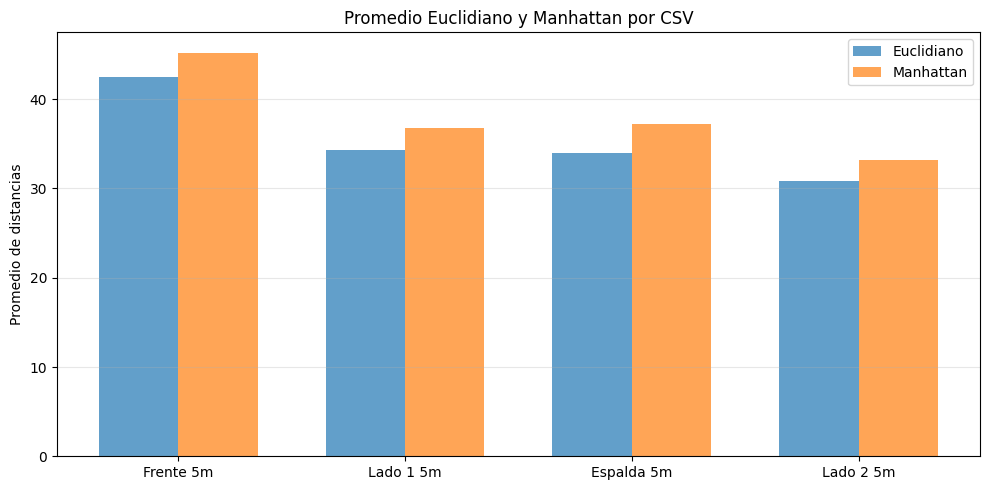

In [17]:

# === CSV y configuración ===
csv_files = [
    'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL15m_nano_ByN.csv",
    'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
    "Estadisticas/EstadisticasL25m_nano_ByN.csv"
]
nombres = ["Frente 5m", "Lado 1 5m", "Espalda 5m", "Lado 2 5m"]
colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]

cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# === CARGA DE CSV ===
dfs = [pd.read_csv(f) for f in csv_files]

# === CALCULAR PROMEDIOS POR CSV ===
prom_euclid = []
prom_manh   = []

for df in dfs:
    euclid_fila = df[cols_euclid].mean(axis=1)  # Promedio por fila
    manh_fila   = df[cols_manh].mean(axis=1)    # Promedio por fila
    prom_euclid.append(euclid_fila.mean())      # Promedio total del CSV
    prom_manh.append(manh_fila.mean())

# === GRAFICA DE BARRAS ===
x = np.arange(len(nombres))
ancho = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - ancho/2, prom_euclid, width=ancho, color='tab:blue', alpha=0.7, label='Euclidiano')
plt.bar(x + ancho/2, prom_manh, width=ancho, color='tab:orange', alpha=0.7, label='Manhattan')

plt.xticks(x, nombres)
plt.ylabel("Promedio de distancias")
plt.title("Promedio Euclidiano y Manhattan por CSV")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


### Coeficiente de variación relativa.
$CV=\frac{desviación estandar}{promedio}$

Normaliza esa dispersión respecto al tamaño del promedio (variación relativa)

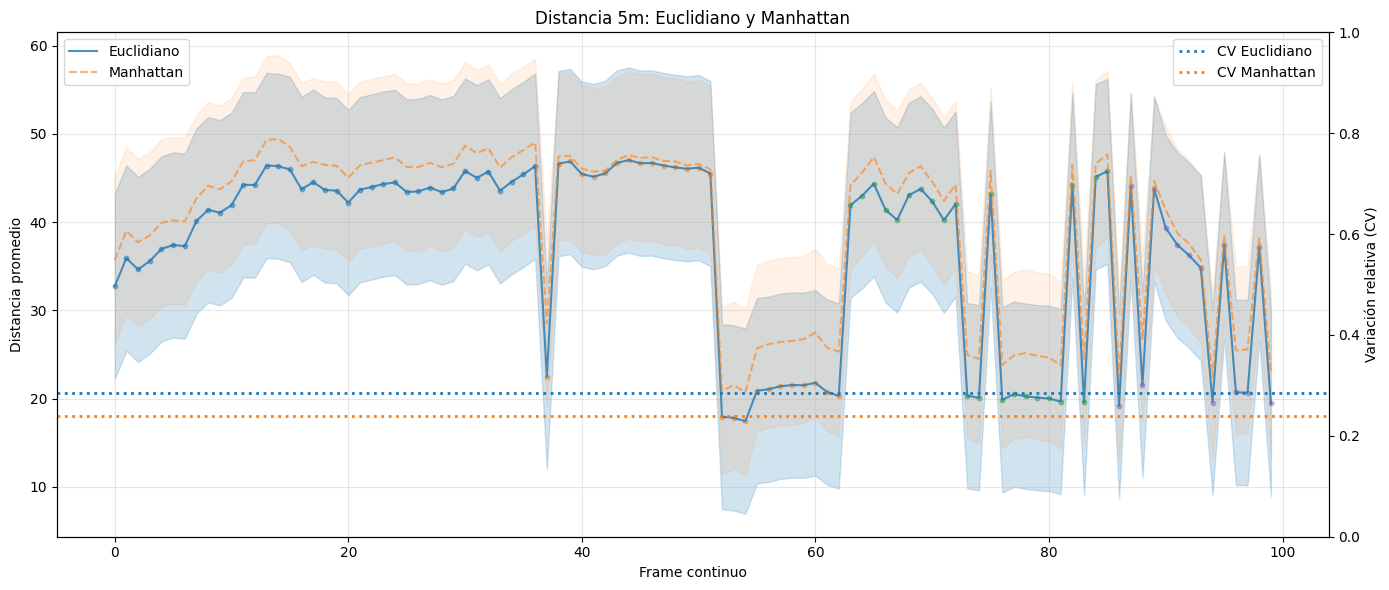

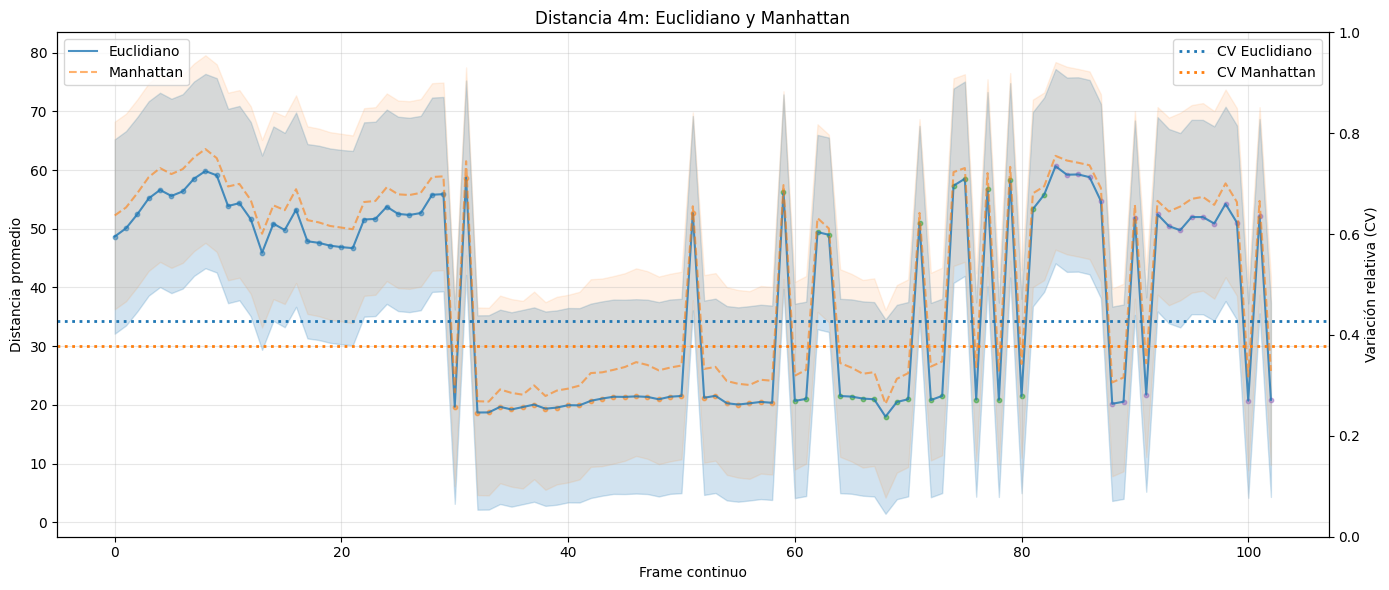

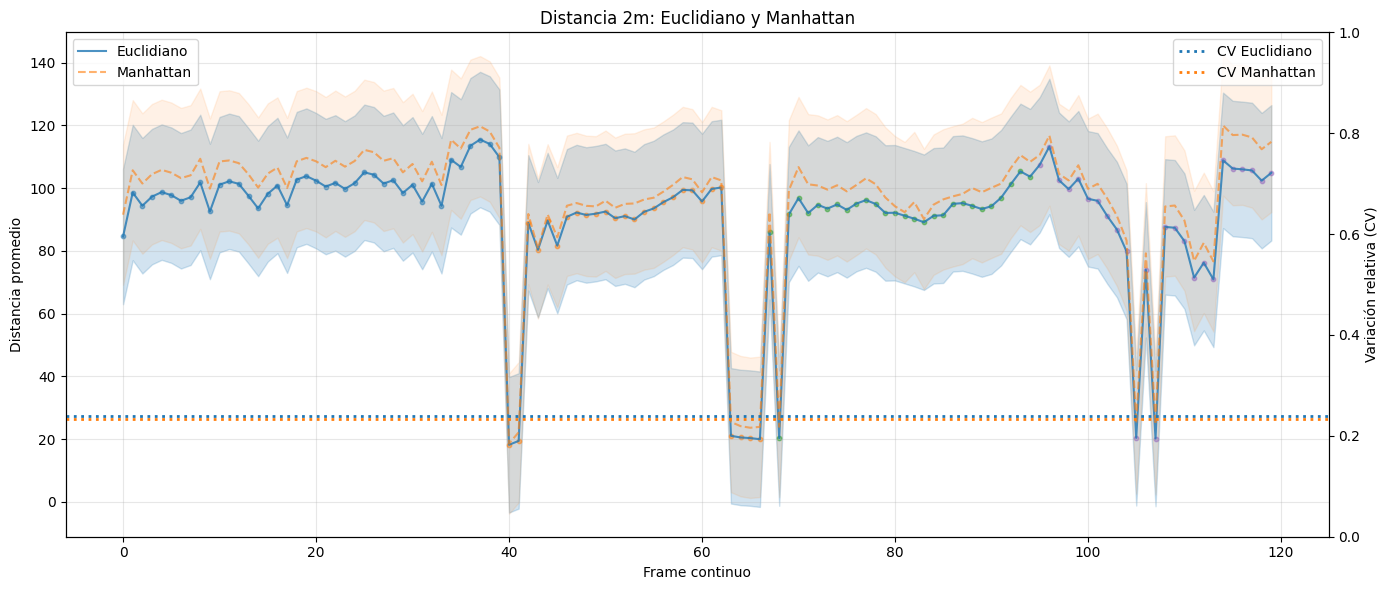

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Distancias y sus CSV
distancias = {
    "5m": [
        'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL15m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL25m_nano_ByN.csv"
    ],
    "4m": [
        'Estadisticas/EstadisticasF_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL14m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL24m_nano_ByN.csv"
    ],
    "2m": [
        'Estadisticas/EstadisticasF_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL12m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL22m_nano_ByN.csv"
    ]
}

nombres = ["Frente", "Lado 1", "Espalda", "Lado 2"]
colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]

cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# --- Gráfica combinada de 5m (como la que te gustó) ---
# Puedes copiar tu bloque de código anterior aquí
# ...

# --- Graficar para cada distancia ---
for dist, csv_files in distancias.items():
    euclid_total = []
    manh_total = []
    frames_total = []
    posicion_total = []
    frame_offset = 0
    
    for f, nombre in zip(csv_files, nombres):
        df = pd.read_csv(f)
        if df.empty:  # omitir CSV vacíos
            continue
        
        euclid_fila = df[cols_euclid].mean(axis=1)
        manh_fila   = df[cols_manh].mean(axis=1)
        frames = df["frame"] + frame_offset
        
        euclid_total.extend(euclid_fila)
        manh_total.extend(manh_fila)
        frames_total.extend(frames)
        posicion_total.extend([nombre]*len(df))
        
        if len(frames) > 0:
            frame_offset = frames.iloc[-1] + 1
    
    frames_total = np.array(frames_total)
    euclid_total = np.array(euclid_total)
    manh_total   = np.array(manh_total)
    posicion_total = np.array(posicion_total)
    
    std_euclid = np.std(euclid_total)
    std_manh   = np.std(manh_total)
    cv_euclid  = std_euclid / np.mean(euclid_total)
    cv_manh    = std_manh / np.mean(manh_total)
    
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax2 = ax1.twinx()
    
    ax1.plot(frames_total, euclid_total, color='tab:blue', alpha=0.8, label='Euclidiano')
    ax1.plot(frames_total, manh_total, color='tab:orange', alpha=0.6, linestyle='--', label='Manhattan')
    
    ax1.fill_between(frames_total, euclid_total-std_euclid, euclid_total+std_euclid, color='tab:blue', alpha=0.2)
    ax1.fill_between(frames_total, manh_total-std_manh, manh_total+std_manh, color='tab:orange', alpha=0.1)
    
    for nombre, color in zip(nombres, colores):
        mask = posicion_total == nombre
        ax1.scatter(frames_total[mask], euclid_total[mask], color=color, s=10, alpha=0.5)
    
    ax2.axhline(cv_euclid, color='tab:blue', linestyle=":", linewidth=2, label="CV Euclidiano")
    ax2.axhline(cv_manh, color='tab:orange', linestyle=":", linewidth=2, label="CV Manhattan")
    
    ax1.set_xlabel("Frame continuo")
    ax1.set_ylabel("Distancia promedio")
    ax2.set_ylabel("Variación relativa (CV)")
    ax1.set_title(f"Distancia {dist}: Euclidiano y Manhattan")
    ax1.grid(alpha=0.3)
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


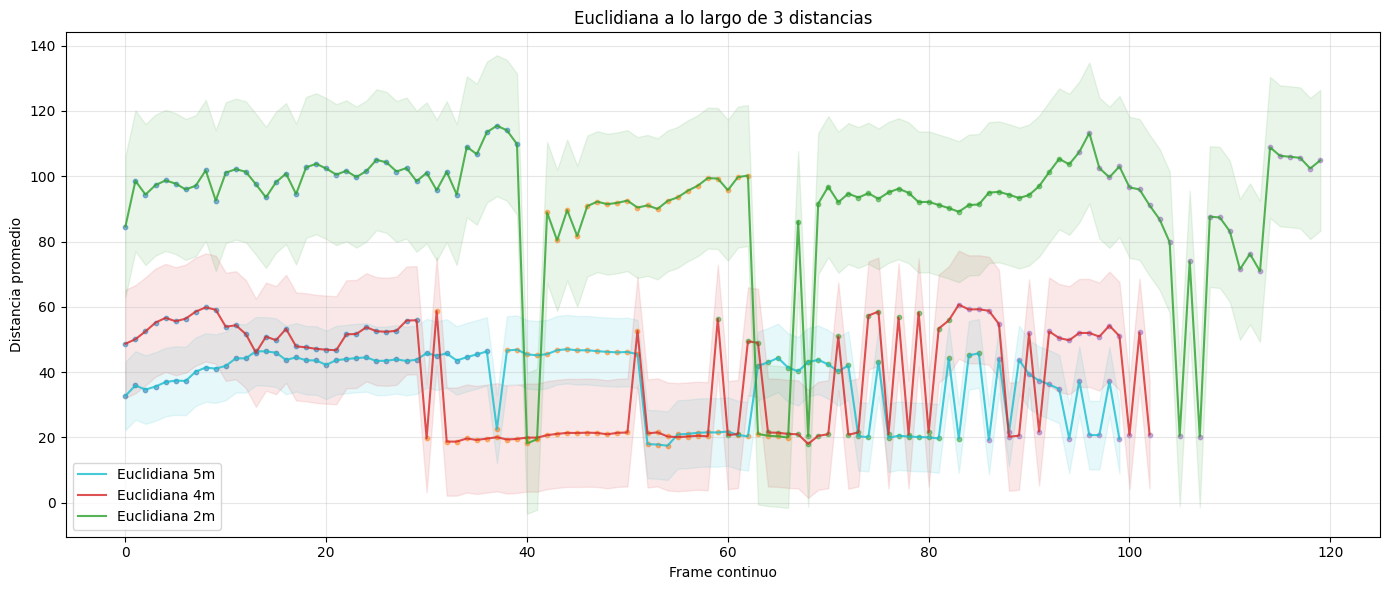

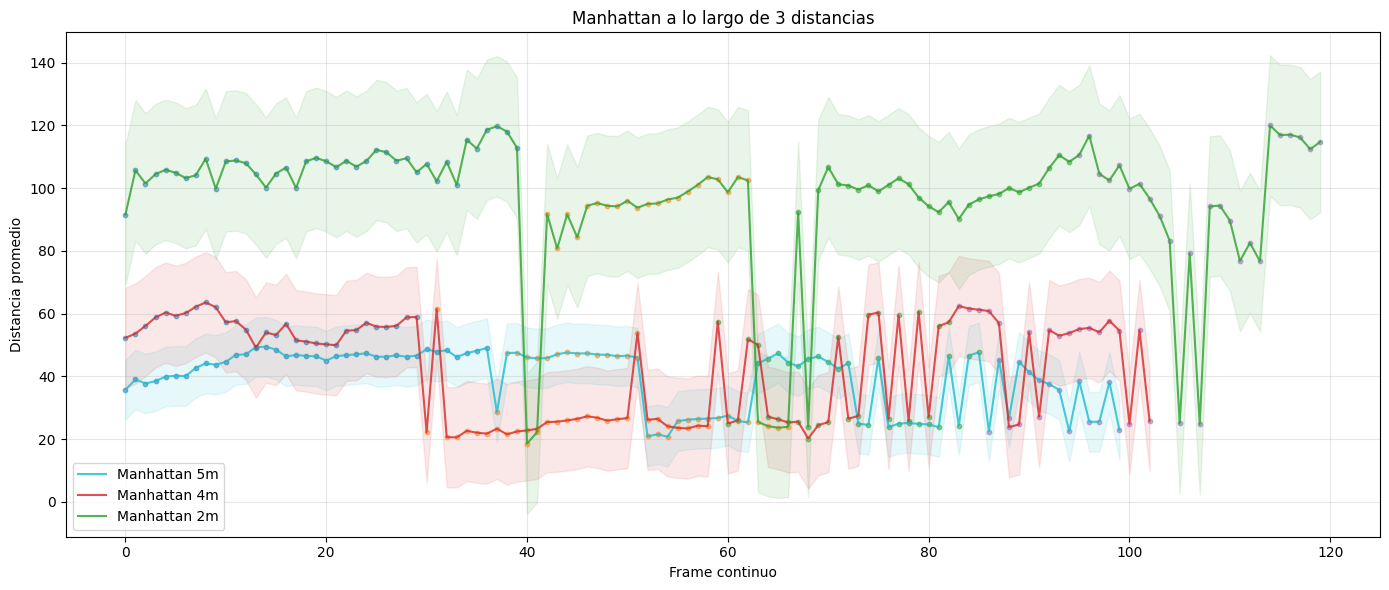

In [23]:

# Distancias y sus CSV
distancias = {
    "5m": [
        'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL15m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL25m_nano_ByN.csv"
    ],
    "4m": [
        'Estadisticas/EstadisticasF_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL14m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL24m_nano_ByN.csv"
    ],
    "2m": [
        'Estadisticas/EstadisticasF_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL12m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL22m_nano_ByN.csv"
    ]
}

nombres = ["Frente", "Lado 1", "Espalda", "Lado 2"]
pos_colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]
dist_colores = {"5m": "tab:cyan", "4m": "tab:red", "2m": "tab:green"}

cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# --- Función para cargar y combinar CSV por distancia ---
def cargar_datos(csv_files):
    euclid_total = []
    manh_total = []
    frames_total = []
    posicion_total = []
    frame_offset = 0
    
    for f, nombre in zip(csv_files, nombres):
        df = pd.read_csv(f)
        if df.empty:
            continue
        euclid_fila = df[cols_euclid].mean(axis=1)
        manh_fila   = df[cols_manh].mean(axis=1)
        frames = df["frame"] + frame_offset
        
        euclid_total.extend(euclid_fila)
        manh_total.extend(manh_fila)
        frames_total.extend(frames)
        posicion_total.extend([nombre]*len(df))
        
        if len(frames) > 0:
            frame_offset = frames.iloc[-1] + 1
    
    return (np.array(frames_total),
            np.array(euclid_total),
            np.array(manh_total),
            np.array(posicion_total))

# --- Graficar Euclidiana ---
plt.figure(figsize=(14,6))
for dist, csv_files in distancias.items():
    frames_total, euclid_total, _, posicion_total = cargar_datos(csv_files)
    std_euclid = np.std(euclid_total)
    plt.plot(frames_total, euclid_total, color=dist_colores[dist], alpha=0.8, label=f"Euclidiana {dist}")
    plt.fill_between(frames_total, euclid_total-std_euclid, euclid_total+std_euclid, color=dist_colores[dist], alpha=0.1)
    
    # Puntos de posición
    for nombre, color in zip(nombres, pos_colores):
        mask = posicion_total == nombre
        plt.scatter(frames_total[mask], euclid_total[mask], color=color, s=10, alpha=0.5)

plt.title("Euclidiana a lo largo de 3 distancias")
plt.xlabel("Frame continuo")
plt.ylabel("Distancia promedio")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- Graficar Manhattan ---
plt.figure(figsize=(14,6))
for dist, csv_files in distancias.items():
    frames_total, _, manh_total, posicion_total = cargar_datos(csv_files)
    std_manh = np.std(manh_total)
    plt.plot(frames_total, manh_total, color=dist_colores[dist], alpha=0.8, label=f"Manhattan {dist}")
    plt.fill_between(frames_total, manh_total-std_manh, manh_total+std_manh, color=dist_colores[dist], alpha=0.1)
    
    # Puntos de posición
    for nombre, color in zip(nombres, pos_colores):
        mask = posicion_total == nombre
        plt.scatter(frames_total[mask], manh_total[mask], color=color, s=10, alpha=0.5)

plt.title("Manhattan a lo largo de 3 distancias")
plt.xlabel("Frame continuo")
plt.ylabel("Distancia promedio")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


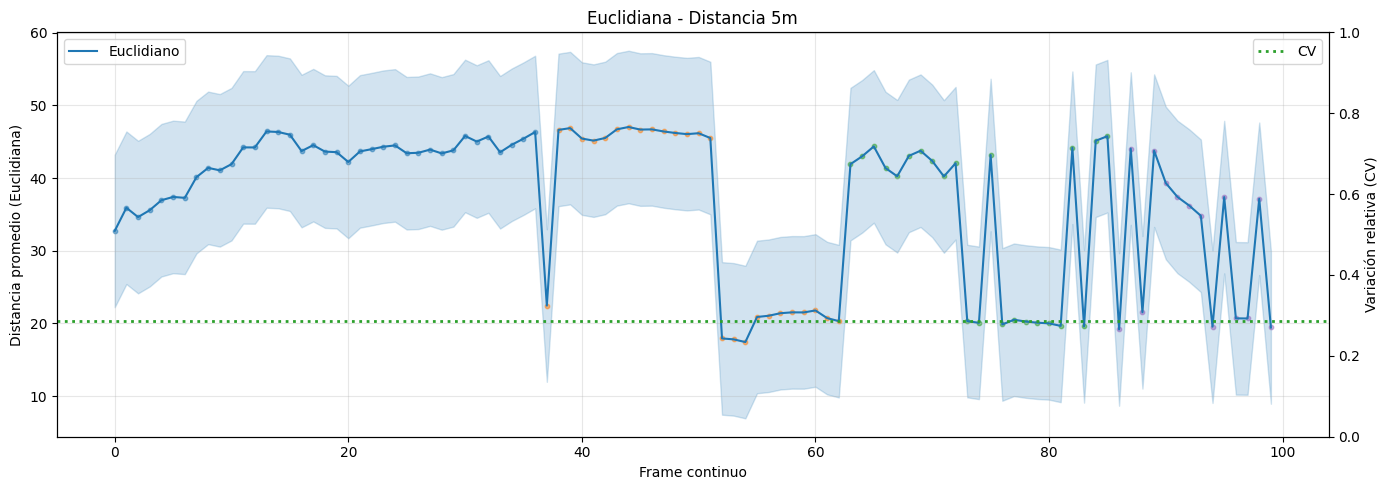

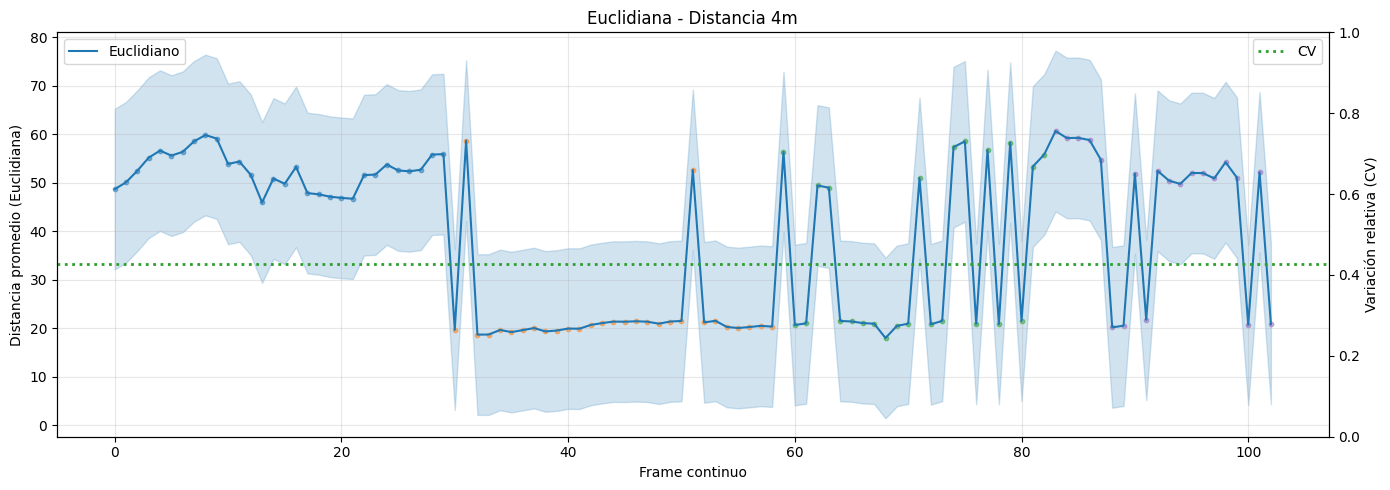

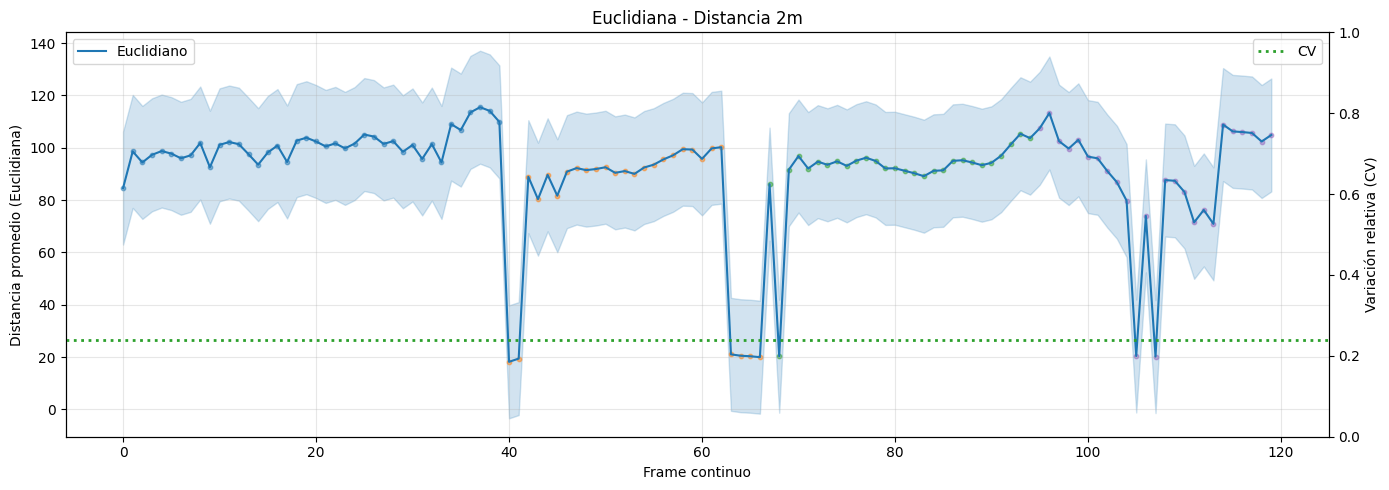

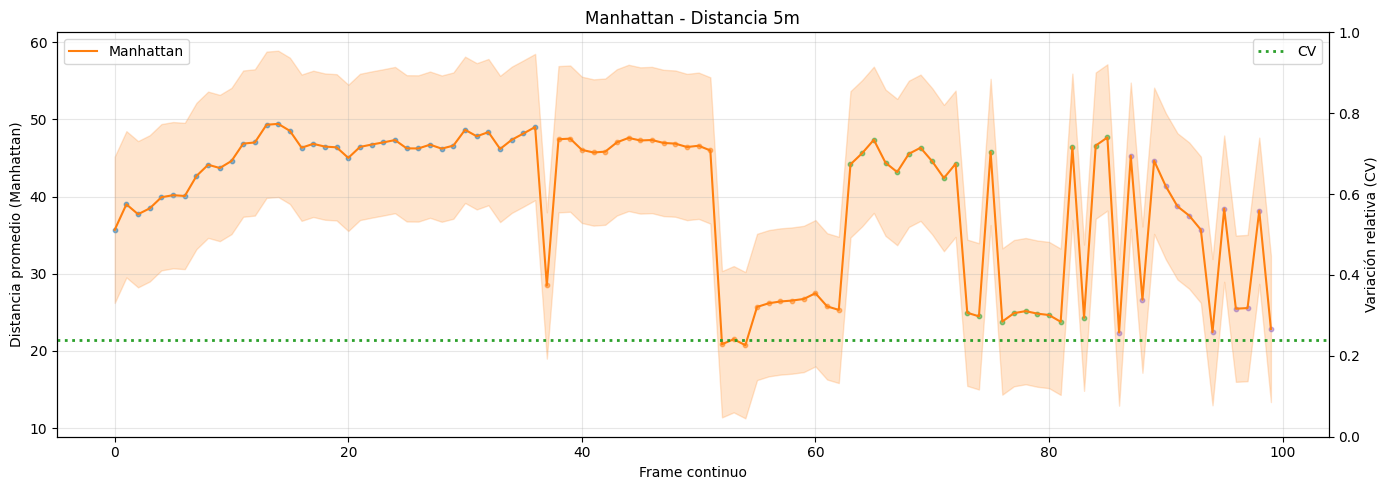

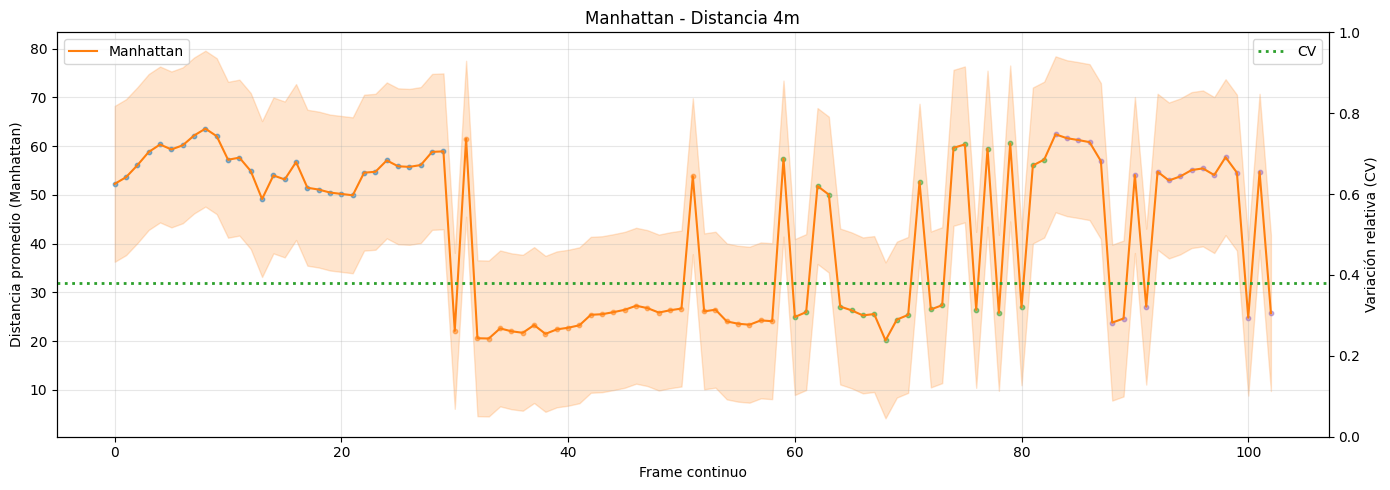

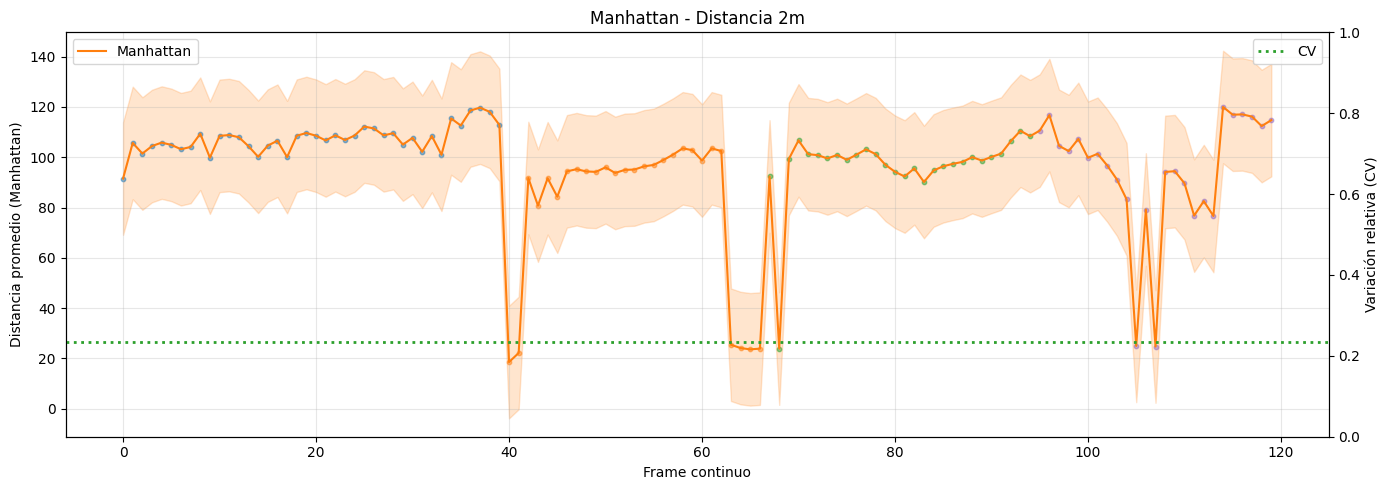

In [27]:

# Distancias y CSV
distancias = {
    "5m": [
        'Estadisticas/EstadisticasF_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL15m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_5m_nano_ByN.csv',
        "Estadisticas/EstadisticasL25m_nano_ByN.csv"
    ],
    "4m": [
        'Estadisticas/EstadisticasF_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL14m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_4m_nano_ByN.csv',
        "Estadisticas/EstadisticasL24m_nano_ByN.csv"
    ],
    "2m": [
        'Estadisticas/EstadisticasF_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL12m_nano_ByN.csv",
        'Estadisticas/EstadisticasE_2m_nano_ByN.csv',
        "Estadisticas/EstadisticasL22m_nano_ByN.csv"
    ]
}

nombres = ["Frente", "Lado 1", "Espalda", "Lado 2"]
pos_colores = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]

cols_euclid = ["dist_euclid_left_shoulder_hip", "dist_euclid_right_shoulder_hip"]
cols_manh   = ["dist_manh_left_shoulder_hip", "dist_manh_right_shoulder_hip"]

# --- Función para cargar datos ---
def cargar_datos(csv_files):
    euclid_total, manh_total, frames_total, posicion_total = [], [], [], []
    frame_offset = 0
    for f, nombre in zip(csv_files, nombres):
        df = pd.read_csv(f)
        if df.empty:
            continue
        euclid_fila = df[cols_euclid].mean(axis=1)
        manh_fila = df[cols_manh].mean(axis=1)
        frames = df["frame"] + frame_offset
        
        euclid_total.extend(euclid_fila)
        manh_total.extend(manh_fila)
        frames_total.extend(frames)
        posicion_total.extend([nombre]*len(df))
        
        if len(frames) > 0:
            frame_offset = frames.iloc[-1] + 1
    
    return np.array(frames_total), np.array(euclid_total), np.array(manh_total), np.array(posicion_total)

# --- Graficar Euclidiana con CV ---
for dist, csv_files in distancias.items():
    frames_total, euclid_total, _, posicion_total = cargar_datos(csv_files)
    std = np.std(euclid_total)
    cv = std / np.mean(euclid_total)
    
    fig, ax1 = plt.subplots(figsize=(14,5))
    ax2 = ax1.twinx()  # eje secundario para CV
    
    # Línea promedio y sombreado ± std
    ax1.plot(frames_total, euclid_total, color='tab:blue', label='Euclidiano')
    ax1.fill_between(frames_total, euclid_total-std, euclid_total+std, color='tab:blue', alpha=0.2)
    
    # Puntos por posición
    for nombre, color in zip(nombres, pos_colores):
        mask = posicion_total == nombre
        ax1.scatter(frames_total[mask], euclid_total[mask], color=color, s=10, alpha=0.5)
    
    # CV en eje secundario
    ax2.axhline(cv, color='tab:green', linestyle=":", linewidth=2, label="CV")
    
    # Etiquetas y títulos
    ax1.set_xlabel("Frame continuo")
    ax1.set_ylabel("Distancia promedio (Euclidiana)")
    ax2.set_ylabel("Variación relativa (CV)")
    ax1.set_title(f"Euclidiana - Distancia {dist}")
    
    ax1.grid(alpha=0.3)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# --- Graficar Manhattan con CV ---
for dist, csv_files in distancias.items():
    frames_total, _, manh_total, posicion_total = cargar_datos(csv_files)
    std = np.std(manh_total)
    cv = std / np.mean(manh_total)
    
    fig, ax1 = plt.subplots(figsize=(14,5))
    ax2 = ax1.twinx()
    
    ax1.plot(frames_total, manh_total, color='tab:orange', label='Manhattan')
    ax1.fill_between(frames_total, manh_total-std, manh_total+std, color='tab:orange', alpha=0.2)
    
    for nombre, color in zip(nombres, pos_colores):
        mask = posicion_total == nombre
        ax1.scatter(frames_total[mask], manh_total[mask], color=color, s=10, alpha=0.5)
    
    ax2.axhline(cv, color='tab:green', linestyle=":", linewidth=2, label="CV")
    
    ax1.set_xlabel("Frame continuo")
    ax1.set_ylabel("Distancia promedio (Manhattan)")
    ax2.set_ylabel("Variación relativa (CV)")
    ax1.set_title(f"Manhattan - Distancia {dist}")
    
    ax1.grid(alpha=0.3)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
